This is a notebook for a crop yield prediction project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yield_df.csv')

Variable                                  	Description

Area                                        	Country names that plant crops
Item                                               	Types of crops planted
Year 	                                        Time of planted crops in years 1990-2013
average_rain_fall_mm_per_year 	Average rain fall in mm per year
pesticides_tonnes 	                Pesticides used in tonnes
avg_temp 	                                Average temperature Celsius
hg/ha_yield 	                                Crops yield production value in hectogram per hectare (Hg/Ha)

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [5]:
df.shape

(28242, 7)

In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.duplicated().sum()

2310

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,25932.0,2001.556455,7.055924,1990.00,1995.00,2001.00,2008.00,2013.00
hg/ha_yield,25932.0,76978.132925,84647.605552,50.00,19996.00,39530.00,104168.00,501412.00
average_rain_fall_mm_per_year,25932.0,1146.836688,717.391098,51.00,593.00,1083.00,1668.00,3240.00
pesticides_tonnes,25932.0,34782.573241,57228.568244,0.04,1597.00,15373.00,45620.00,367778.00
avg_temp,25932.0,20.422251,6.439402,1.30,16.58,21.42,26.06,30.65


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [12]:
df


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


/tmp/ipykernel_326/1933671548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'], palette='husl')


<AxesSubplot: xlabel='count', ylabel='Area'>

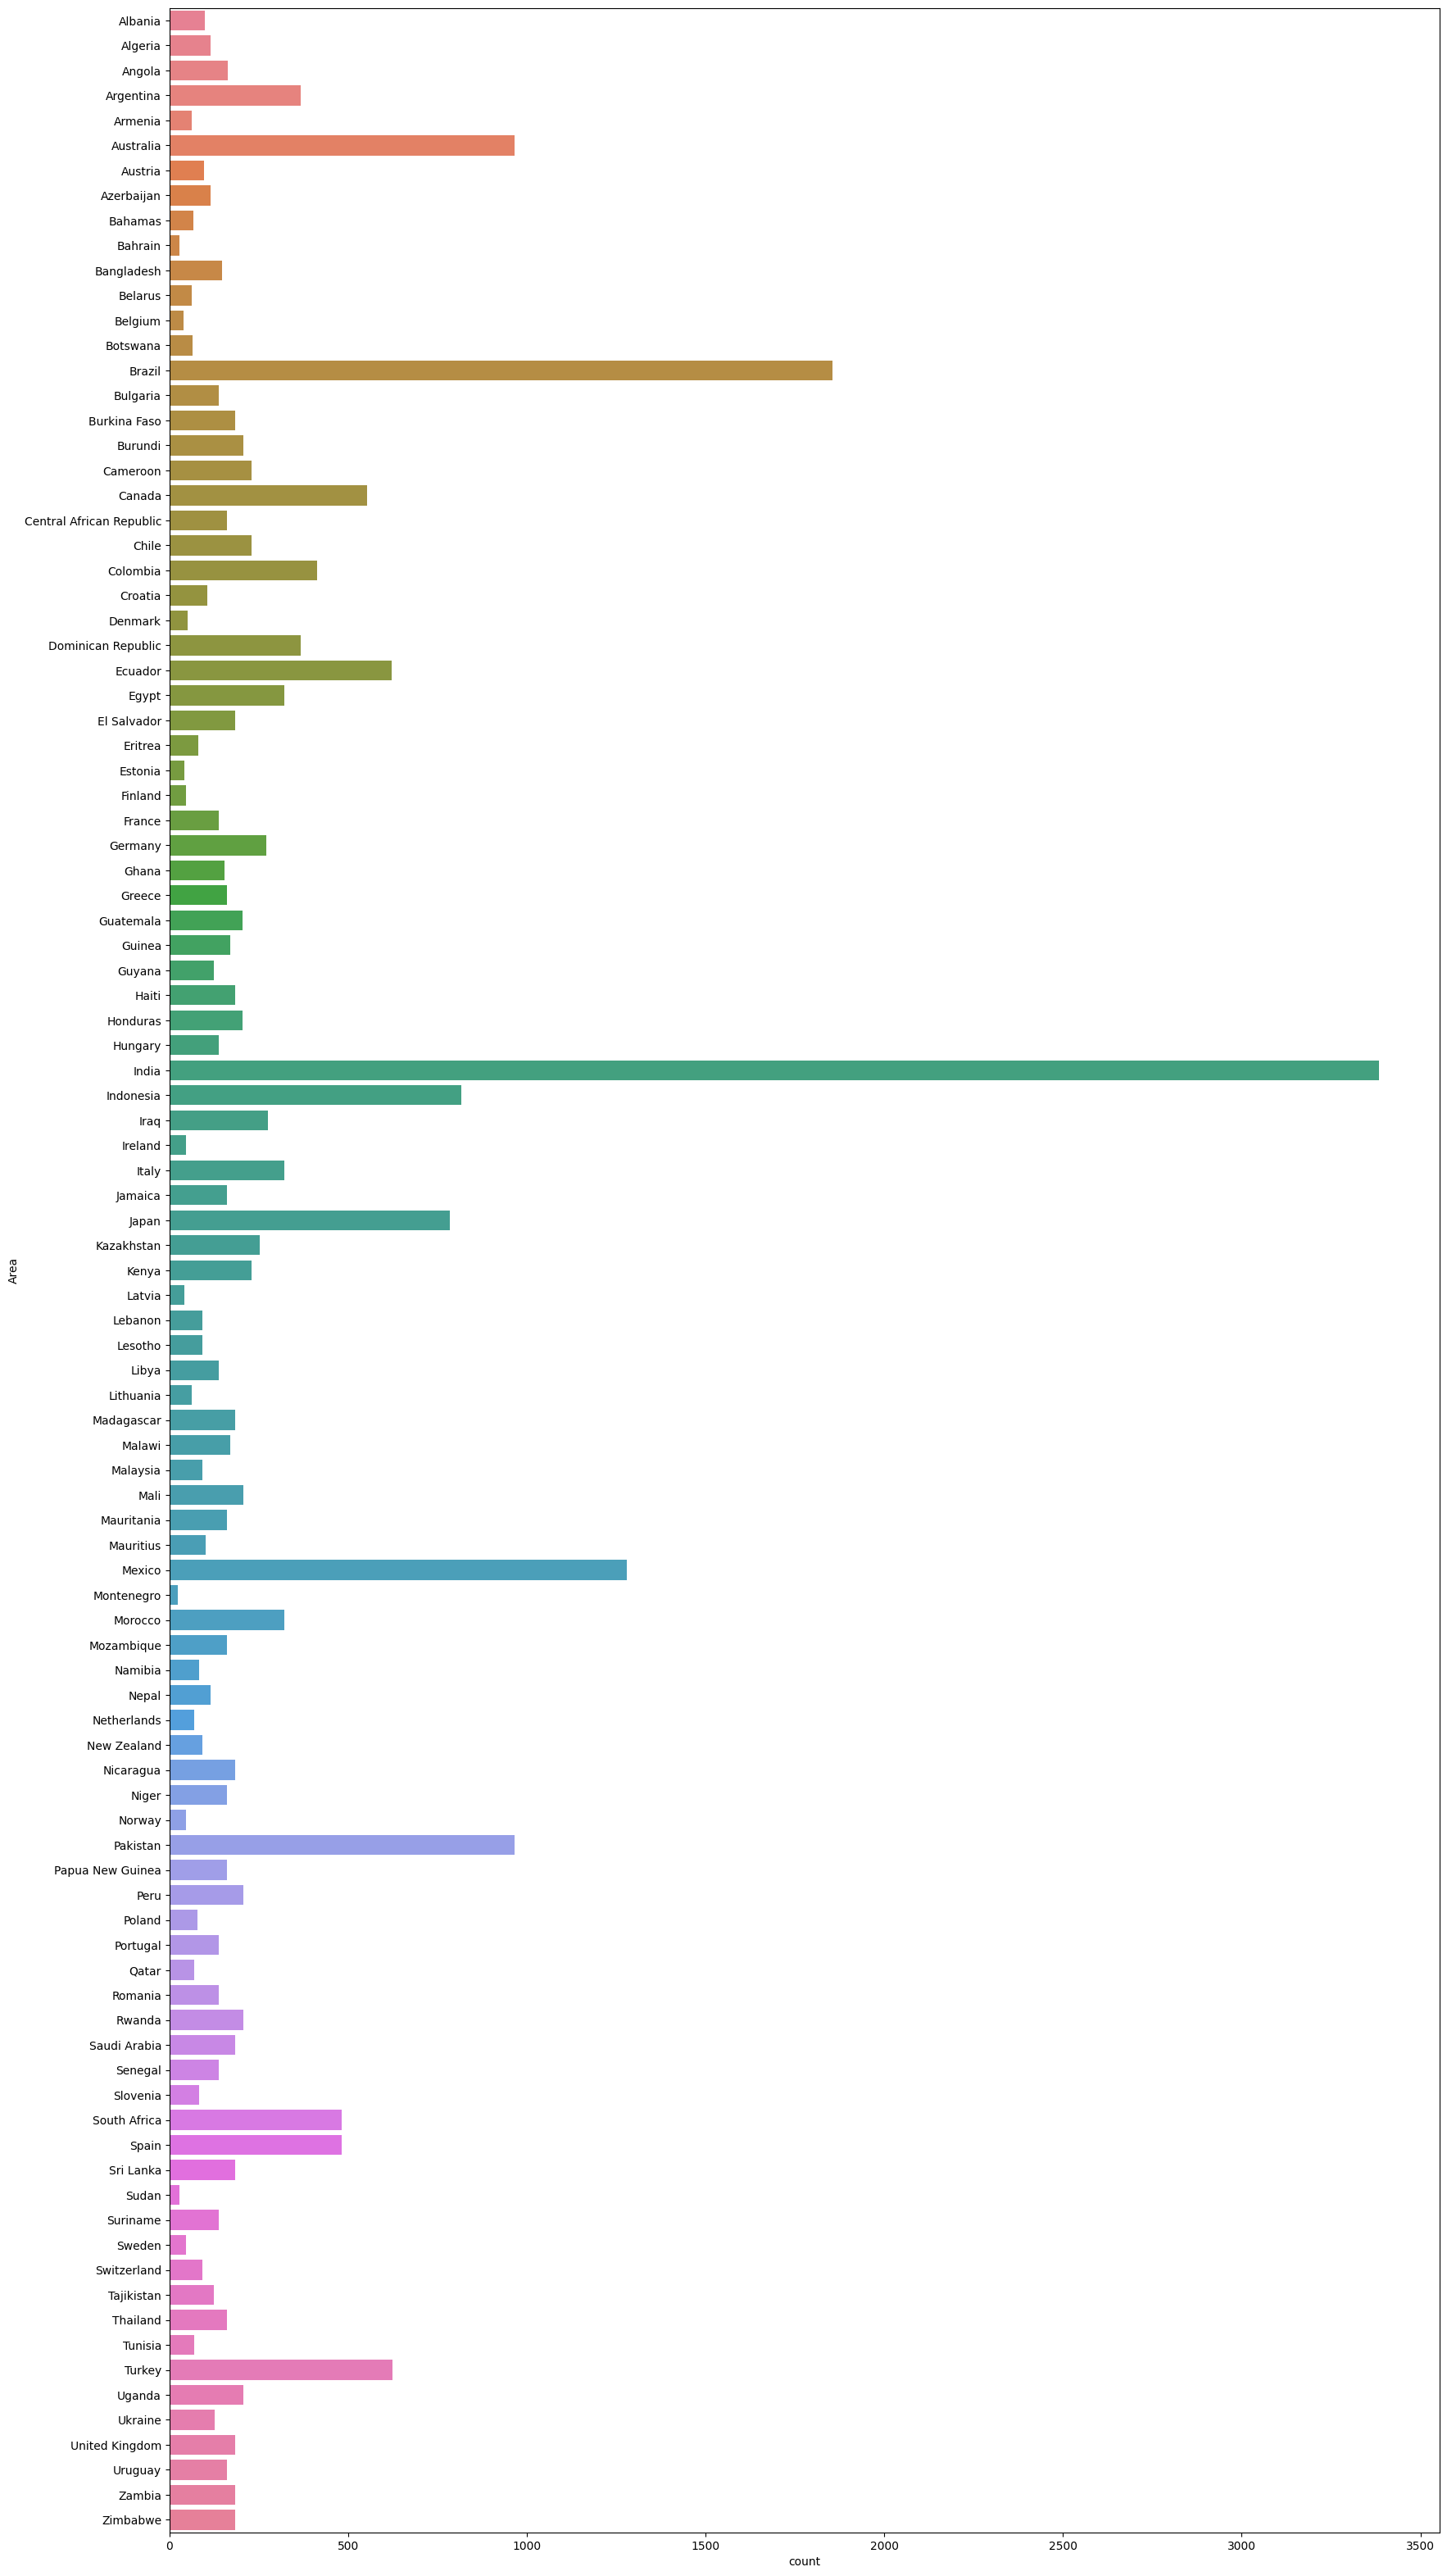

In [13]:
plt.figure(figsize=(20,40))
sns.countplot(y=df['Area'], palette='husl')

/tmp/ipykernel_326/2315333340.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_per_country, y=countries, palette='husl')


<AxesSubplot: >

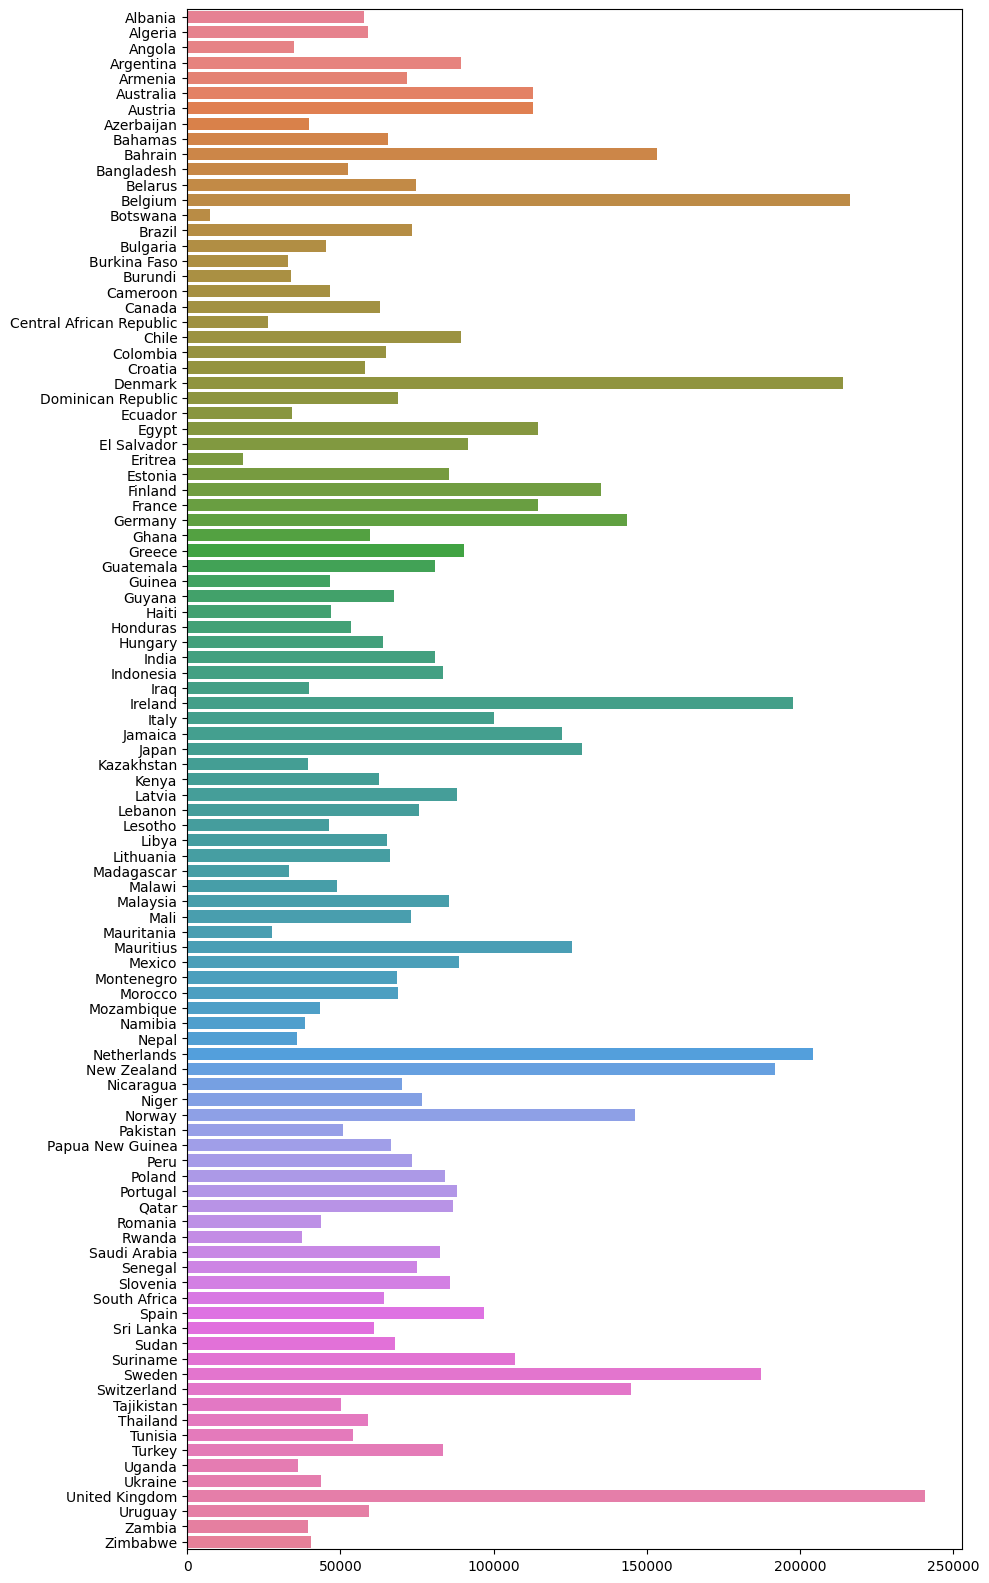

In [14]:
countries = df['Area'].unique()
yield_per_country = []
for country in countries:
    yield_per_country.append(df[df['Area']==country]['hg/ha_yield'].sum() / len(df[df['Area']==country]))
plt.figure(figsize=(10,20))
sns.barplot(x=yield_per_country, y=countries, palette='husl')

/tmp/ipykernel_326/2754988781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Item'], palette='husl')


<AxesSubplot: xlabel='count', ylabel='Item'>

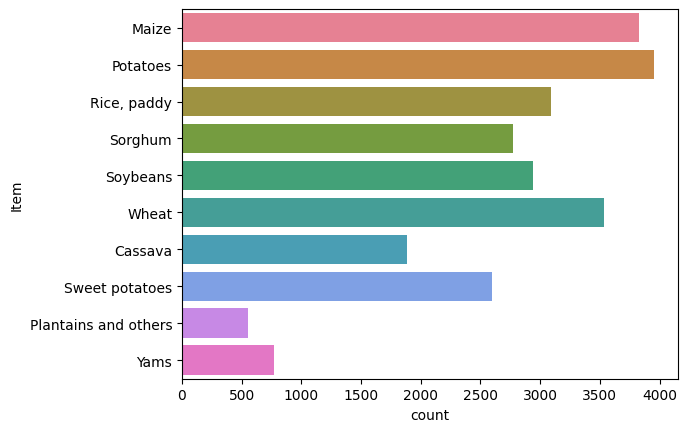

In [15]:
# df['Item'].value_counts()
sns.countplot(y=df['Item'], palette='husl')

/tmp/ipykernel_326/706298186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_per_crop, y=crops, palette='husl')


<AxesSubplot: >

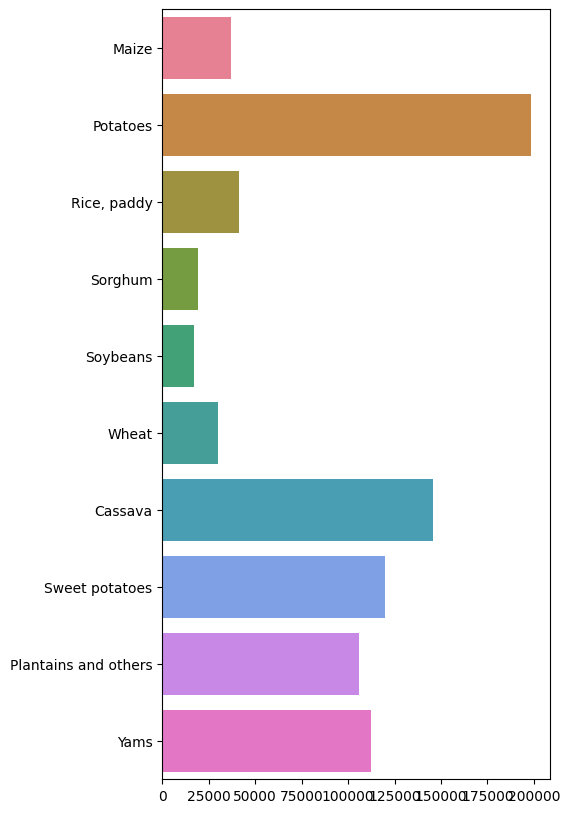

In [16]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum() / len(df[df['Item']==crop]))
plt.figure(figsize=(5,10))
sns.barplot(x=yield_per_crop, y=crops, palette='husl')

In [17]:
X = df.drop('hg/ha_yield', axis=1)
Y = df['hg/ha_yield']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1337)
X_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
13114,India,Sweet potatoes,2005,1083.0,35342.0,25.09


In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencooder', ohe, [0,1]),
        ('standarization', scaler, [2,3,4,5])
    ],
    remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencooder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('standarization', StandardScaler(),
                                 [2, 3, 4, 5])])

In [21]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122895 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor(),
}

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_predicted = model.predict(X_test_dummy)
    print(f"for {name}: MSE = {mean_squared_error(y_test, y_predicted)} & r2 = {r2_score(y_test, y_predicted)}")

for lr: MSE = 1859614906.4057724 & r2 = 0.740591904528592
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35730836121.91016, tolerance: 14860993061.403938
  model = cd_fast.sparse_enet_coordinate_descent(
for lss: MSE = 1859590618.0321913 & r2 = 0.740595292649816
for rg: MSE = 1859914468.7213733 & r2 = 0.7405501169039084
for knr: MSE = 122317258.9985348 & r2 = 0.9829372806752662
for dtr: MSE = 171266520.8527087 & r2 = 0.97610907406723


In [24]:
#selected model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
y_predicted = dtr.predict(X_test_dummy)

In [25]:
def predictor(area:str, item:str, year:int, average_rain_fall_mm_per_year:float, pesticides_tonnes:float, avg_temp:float):
    features = np.array([[area, item, year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp]])
    predicted_value = dtr.predict(preprocessor.transform(features))#.reshape(1,-1)
    return predicted_value[0]

In [26]:
# Cameroon

# Wheat

# 2012

# 12308 -> to be predicted

# 1604

# 1372.47

# 25.18

predictor('Cameroon', 'Wheat', 2012, 1604, 1372.47, 25.18)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


12308.0

In [27]:
df


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [28]:
import dill
dill.dump(preprocessor, open('preprocessor.pkl', 'wb'))
dill.dump(dtr, open('dtr.pkl', 'wb'))

using deep learning

In [29]:
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scipy.sparse import csr_matrix
import tensorflow as tf

# Define the normalization layer
norm = BatchNormalization()

# define a r2_score
def my_r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))


# Build and compile the model
def build_and_compile_model(norm):
  model = Sequential()
  model.add(norm)
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))

  model.compile(loss='mean_absolute_error', optimizer=Adam(0.001), metrics=[my_r2_score])
  return model

model = build_and_compile_model(norm)

# Convert the sparse matrices to dense matrices
X_train_sparse = csr_matrix(X_train_dummy)
X_train_dense = X_train_sparse.toarray()
X_test_sparse = csr_matrix(X_test_dummy)
X_test_dense = X_test_sparse.toarray()

# Convert the dense matrices to NumPy arrays
X_train_dummy = np.array(X_train_dense)
X_test_dummy = np.array(X_test_dense)

# Convert the array-like data to a tf.data.Dataset object
train_ds = tf.data.Dataset.from_tensor_slices((X_train_dummy, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test_dummy, y_test))

# Define the batch size and prefetch buffer size
BATCH_SIZE = 32
BUFFER_SIZE = 1000

# Shuffle and batch the dataset
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Fit the model to the training data
model.fit(train_ds, epochs=200, batch_size=BATCH_SIZE, validation_data=test_ds, callbacks=[EarlyStopping])

# Make predictions on the test data
y_pred = model.predict(X_test)

2024-05-15 09:59:49.049293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 09:59:49.188493: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-15 09:59:49.188519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-15 09:59:49.223805: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 09:59:49.973292: W tensorflow/stream_executor/pla

TypeError: set_model() missing 1 required positional argument: 'model'

In [ ]:

dill.dump(dnn, open('dnn.pkl', 'wb'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=92482b11-6b12-4ab7-b5de-26a1bc8b3348' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>